In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('creditcard.csv')
print(df.head());

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


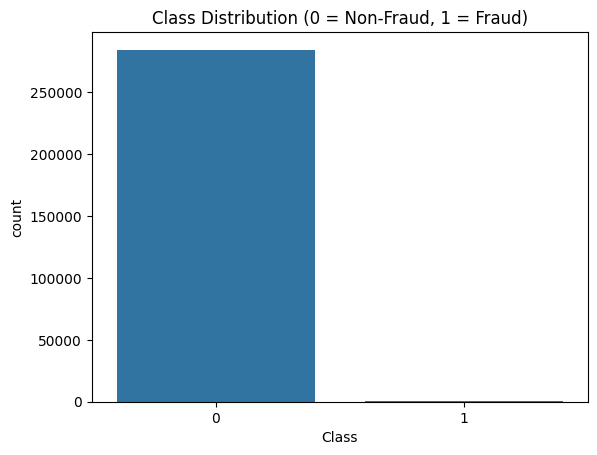

In [6]:
#Class Imbalance
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

In [8]:
# 5️⃣ Feature Scaling
scaler = StandardScaler()

# Scale 'Amount' and 'Time'
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' to use scaled versions
df = df.drop(['Amount', 'Time'], axis=1)

# Rearrange columns for clarity
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [9]:
# 6️⃣ Split Data
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (227845, 30)
Test set shape: (56962, 30)


Exploratory Data Analysis (EDA)

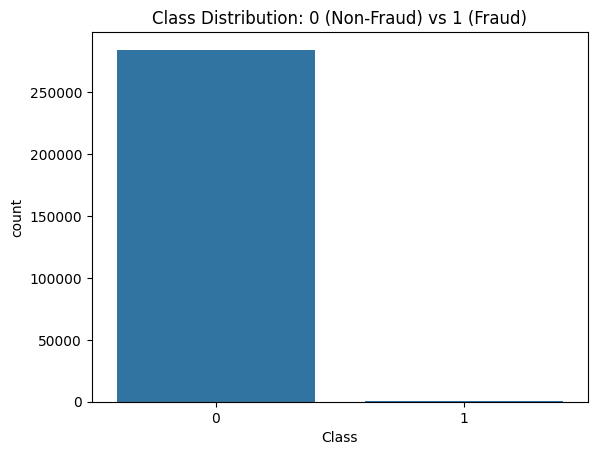

In [10]:
# Class Distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: 0 (Non-Fraud) vs 1 (Fraud)')
plt.show()

In [11]:
fraud_count = df['Class'].value_counts()
print(fraud_count)
print(f"Percentage of Fraud: {round(fraud_count[1]/fraud_count.sum()*100, 4)}%")

Class
0    284315
1       492
Name: count, dtype: int64
Percentage of Fraud: 0.1727%


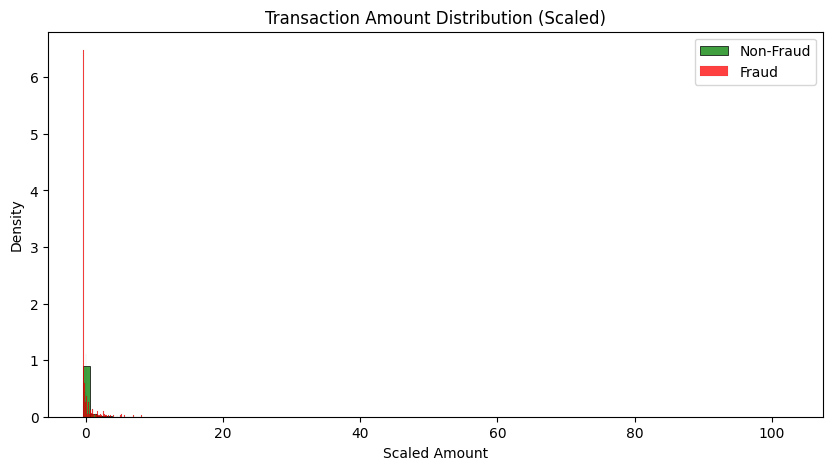

In [12]:
# Transaction Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['scaled_amount'], bins=100, color='green', label='Non-Fraud', stat='density')
sns.histplot(df[df['Class'] == 1]['scaled_amount'], bins=100, color='red', label='Fraud', stat='density')
plt.legend()
plt.title('Transaction Amount Distribution (Scaled)')
plt.xlabel('Scaled Amount')
plt.ylabel('Density')
plt.show()

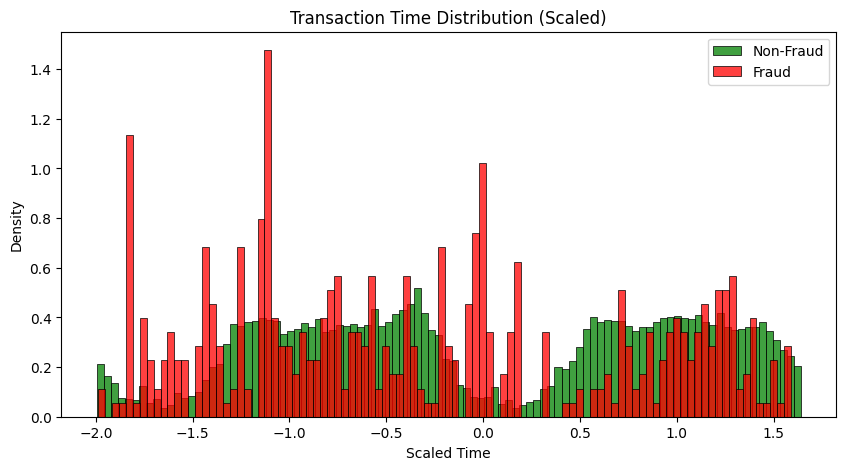

In [13]:
# Transaction Time Distribution
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['scaled_time'], bins=100, color='green', label='Non-Fraud', stat='density')
sns.histplot(df[df['Class'] == 1]['scaled_time'], bins=100, color='red', label='Fraud', stat='density')
plt.legend()
plt.title('Transaction Time Distribution (Scaled)')
plt.xlabel('Scaled Time')
plt.ylabel('Density')
plt.show()

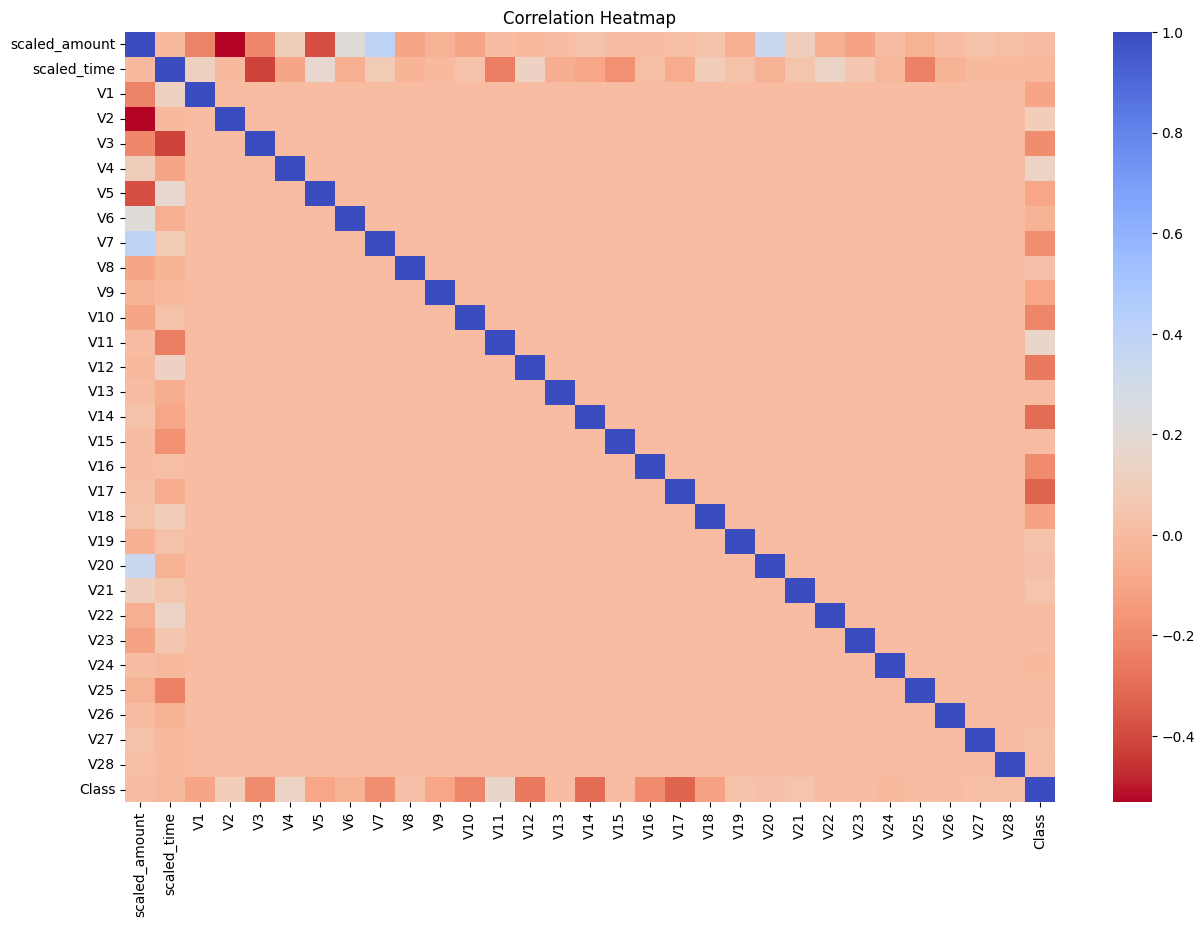

In [14]:
# Correlation Heatmap
plt.figure(figsize=(15,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Model Train

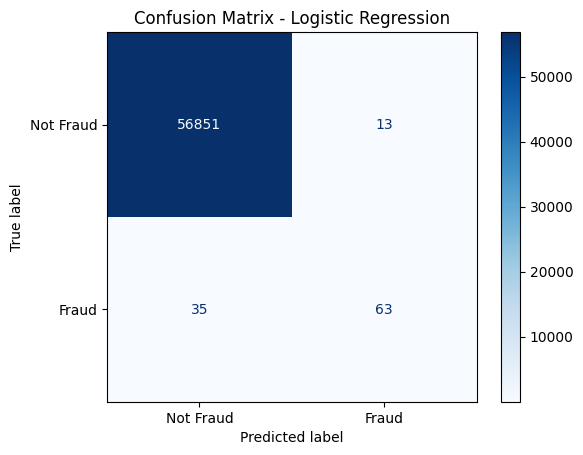

Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC-AUC Score: 0.9573


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay


log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

# Evaluation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")